In [1]:
import sys
sys.path.append('../scripts/')
from robot import*
from scipy.stats import multivariate_normal,norm,expon

Duplicate key in file WindowsPath('C:/Users/tauyu/anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')


In [7]:
class EstimationAgent(Agent):
    def __init__(self,time_interval,nu,omega,estimator):
        super().__init__(nu,omega)
        self.estimator=estimator
        self.time_interval=time_interval
    
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)
    

In [15]:
#改変したコード(robot.pyのRobotクラスにある指数分布のモデルを参考)
class Particle:
    def __init__(self,init_pose,noise_per_meter=5,noise_std=math.pi/60):
        self.pose=init_pose
        self.r=0.2
        self.noise_pdf=expon(scale=1.0/(1e-100+noise_per_meter))
        self.distance_until_noise=self.noise_pdf.rvs()
        self.theta_noise=norm(scale=noise_std)
        
    def noise(self,pose,nu,omega,time_interval):
        self.distance_until_noise-=abs(nu)*time_interval+self.r*abs(omega)*time_interval
        if self.distance_until_noise<=0.0:
            self.distance_until_noise+=self.noise_pdf.rvs()
            pose[2]+=self.theta_noise.rvs()
        
        return pose
        
    def motion_update(self,nu,omega,time):
        self.pose=IdealRobot.state_transition(nu,omega,time_interval,time,self.pose)
        self.pose=IdealRobot.noise(self.pose,nu,omega,time_interval)

#元々のコード
#class Particle: 
   # def __init__(self, init_pose, weight):
     #   self.pose = init_pose
     #   self.weight = weight
        
   # def motion_update(self, nu, omega, time, noise_rate_pdf): 
   #     ns = noise_rate_pdf.rvs()
  #      pnu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)  ←元々のガウス分布による制御モデルの箇所
   #     pomega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)　←元々のガウス分布による制御モデルの箇所
   #     self.pose = IdealRobot.state_transition(pnu, pomega, time, self.pose)

In [5]:
class Mcl:
    def __init__(self,init_pose,num):
        self.particles=[Particle(init_pose) for i in range(num)]
        
    def motion_update(self,nu,omega,time):
        for p in self.particles: p.motion_update(nu,omega,time)
        
    def draw(self,ax,elems):
        xs=[p.pose[0] for p in self.particles]
        ys=[p.pose[1] for p in self.particles]
        vxs=[math.cos(p.pose[2]) for p in self.particles]
        vys=[math.sin(p.pose[2]) for p in self.particles]
        elems.append(ax.quiver(xs,ys,vxs,vys,color="blue",alpha=0.5))

<IPython.core.display.Javascript object>


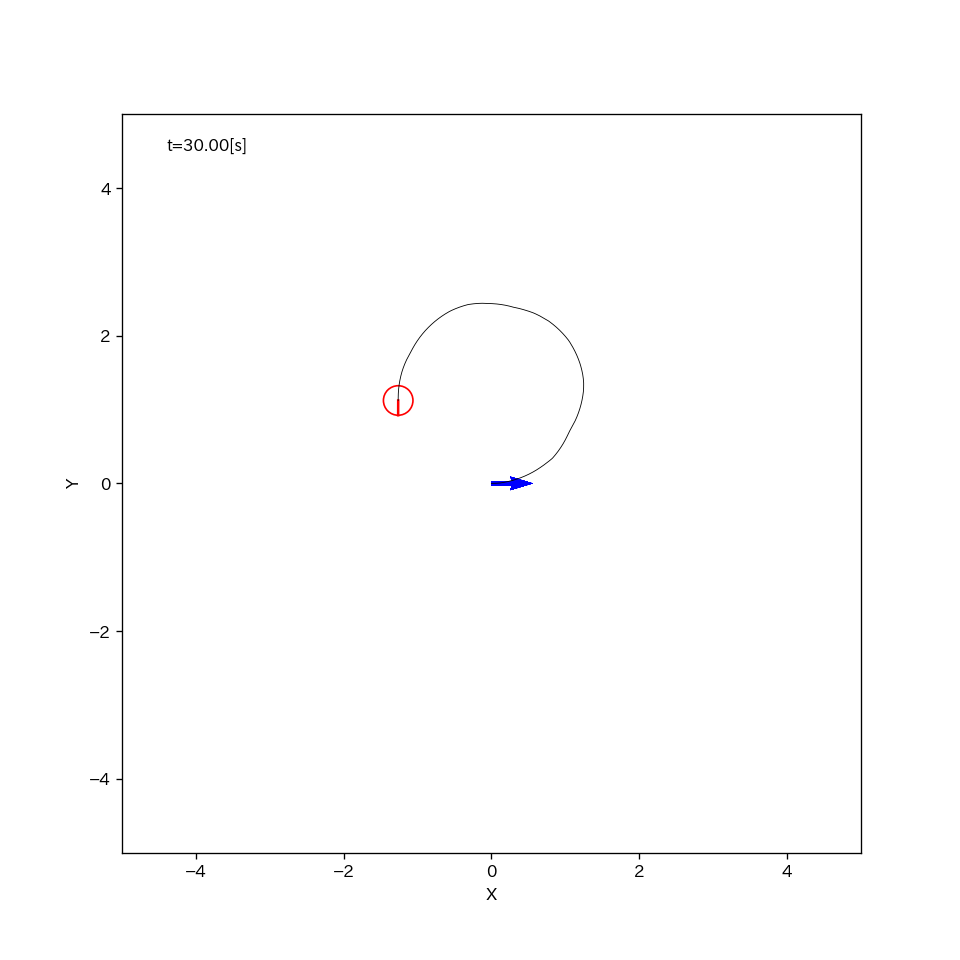

In [16]:
def trial():
    time_interval=0.1
    world=World(30,time_interval)
    
    initial_pose=np.array([0,0,0]).T
    estimator=Mcl(initial_pose,100)
    circling=EstimationAgent(time_interval,0.2,10.0/180*math.pi,estimator)
    r=Robot(initial_pose,sensor=None,agent=circling,color="red")
    world.append(r)
    
    

    world.draw()
    
trial()　　　#パーティクルの姿勢がどうしても更新されない

In [ ]:
expon(scale=1.0/(1e-100+5)).rvs()

In [ ]:
expon.rvs(size=4)